In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as rfr
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
# df = pd.read_csv('ffinalcar.csv')

In [2]:
# df = pd.read_csv('fullcar.csv')

In [2]:
df = pd.read_csv('nnewcar.csv')

In [3]:
df.iloc[:,1:]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,n_price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,10938
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,41748
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,14976
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,19929
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,54093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,12043
6196,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,22168
6197,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,30616
6198,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,21888


In [4]:
df = df[df['Kilometers_Driven'] < 1000000] # 650만 키로수는 이상치라고 생각하여 제거

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6199 entries, 0 to 6199
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6199 non-null   object 
 1   Location           6199 non-null   object 
 2   Price              6199 non-null   float64
 3   Year               6199 non-null   int64  
 4   Kilometers_Driven  6199 non-null   int64  
 5   Fuel_Type          6199 non-null   object 
 6   Transmission       6199 non-null   object 
 7   Owner_Type         6199 non-null   object 
 8   Mileage            6199 non-null   float64
 9   Engine             6199 non-null   float64
 10  Power              6199 non-null   float64
 11  Seats              6199 non-null   float64
 12  n_price            6199 non-null   int64  
 13  car                6199 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 726.4+ KB


In [5]:
def change(x):
    y = x.split()[0]
    if y == 'Land':
        yy = x.split()[2] + x.split()[3]
        return y
    else:
        yy = x.split()[1]
        return yy

df['car'] = df['Name'].apply(change) 

In [6]:
def change(x):
    y = x.split()[0]
    return y

df['Name'] = df['Name'].apply(change)

In [9]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,n_price,car
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,10938,Wagon
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,41748,Creta
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,14976,Jazz
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,19929,Ertiga
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,54093,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,Tata,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,12043,Tiago
6196,Ford,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,22168,EcoSport
6197,Jeep,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,30616,Compass
6198,Maruti,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,21888,Vitara


In [8]:
df = df.iloc[:,1:]

In [9]:
df = df.iloc[:-1,:] #현대차 7천원도 말이안되서 제거

In [10]:
df = df[df['Price']<245000] # 레인지로버 2억5 천 이상치로 판단하여 제거

In [11]:
df['Year'] = df['Year'].astype('object')
df['Seats'] = df['Seats'].astype('object')

In [7]:
# def change_e(x):
#     y = float(x.split()[0])
#     return y

# def change_m(x):
#     y = float(x.split('k')[0])
#     return y

# df['Mileage'] = df['Mileage'].apply(change_m)
# df['Engine'] = df['Engine'].apply(change_e)

In [13]:
df

df['Price'] = np.log(df['Price'])

In [14]:
a = df.select_dtypes(exclude= 'object').columns.to_list()[1:]
scaler = StandardScaler()
df.loc[:,a] = scaler.fit_transform(df.loc[:,a])

In [11]:
# one-hot
df = pd.get_dummies(df)

/tmp/ipykernel_19860/4088029607.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df)
/tmp/ipykernel_19860/4088029607.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df)


In [15]:
# labeling
b = df.select_dtypes(include = 'object').columns.to_list()
encoder = LabelEncoder()
df.loc[:,b] = df.loc[:,b].apply(encoder.fit_transform)

/tmp/ipykernel_20520/1283298397.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,b] = df.loc[:,b].apply(encoder.fit_transform)


In [10]:
# df['Price'] = np.log(df['Price'])

In [16]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,n_price,car
0,17,9,7.894572,12,0.394091,0,1,0,1.863227,-1.032637,-1.009941,3,-0.792834,190
1,10,10,9.860684,17,-0.427414,1,1,0,0.321958,-0.061790,0.246721,3,0.278703,53
2,9,2,8.839033,13,-0.294913,4,1,0,-0.004977,-0.698493,-0.445884,3,-0.652397,100
3,17,2,9.126715,14,0.791593,1,1,0,0.566604,-0.617035,-0.444775,5,-0.480137,69
4,1,3,10.210778,15,-0.436159,1,0,2,-0.672193,0.579899,0.516376,3,0.708047,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6194,5,2,9.045144,18,-0.559915,4,1,0,0.357543,-0.700155,-0.846671,3,-0.772627,89
6195,26,10,9.289401,18,-0.416470,1,1,0,2.014463,-0.951179,-0.809732,3,-0.754403,177
6196,8,7,9.508571,19,-0.480017,4,1,0,-0.271864,-0.203095,0.157329,3,-0.402267,62
6197,13,9,10.234177,20,-1.354920,4,1,0,-0.494269,-0.417546,0.870989,3,-0.108456,48


0.2670737950326676
0.36287584073647694
0.833485703852959
0.845072376437588
[-6.49382419e-03  1.31992193e-01 -3.56431262e-02 -7.74240679e-02
 -3.43001971e-01 -3.89634715e-02 -5.57665301e-02  3.73151006e-01
 -7.40116391e-02  1.65556621e-01 -1.01097382e-04]


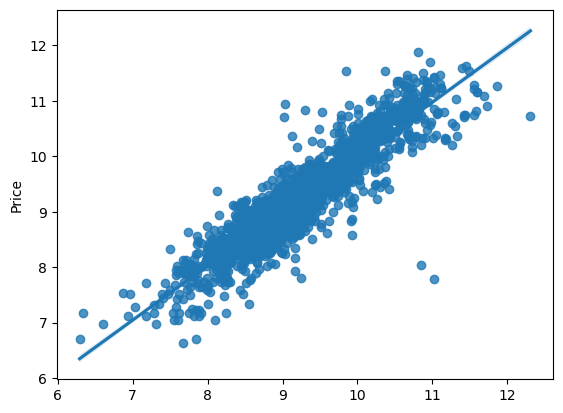

In [17]:
df = df.reset_index(drop=True)
df_y = df['Price']
df_x = df.drop(columns=['Price','Location','Power'] , axis=1)
# poly = PolynomialFeatures(degree=2)
# poly_pr = poly.fit_transform(df_x)


# df_x = pd.concat([df_x,poly_pr],axis=1)

idx = [i for i in range(len(df))]
train_idx, test_idx = train_test_split(idx, test_size=0.3, shuffle=True, random_state=2024)
tr_x = df_x.loc[train_idx]
te_x = df_x.loc[test_idx]
tr_y = df_y.loc[train_idx]
te_y = df_y.loc[test_idx]
# tr_x = poly_pr[train_idx]
# te_x = poly_pr[test_idx]


lr_model = LinearRegression().fit(tr_x,tr_y)
pred = lr_model.predict(te_x)
print(mean_absolute_error(te_y,pred))
print(np.sqrt(mean_squared_error(te_y,pred)))
print(r2_score(te_y,pred))
print(lr_model.score(tr_x,tr_y))
sns.regplot(y=te_y,x=pred)
print(lr_model.coef_)

In [29]:
rfr_model = rfr(random_state=2024)
params ={'n_estimators':[300,500,1000], 'min_samples_leaf':[5,15,30] , 'min_samples_split' : [30,50,100] , 'max_depth':[5,7,10,15]}
rfr_grid = GridSearchCV(rfr_model,params,scoring='r2',n_jobs=-1).fit(tr_x,tr_y)
print(rfr_grid.best_estimator_)

KeyboardInterrupt: 

0.22825129479327627
0.3366682271778043
0.8566691487916035
0.8847148332294739


<Axes: ylabel='Price'>

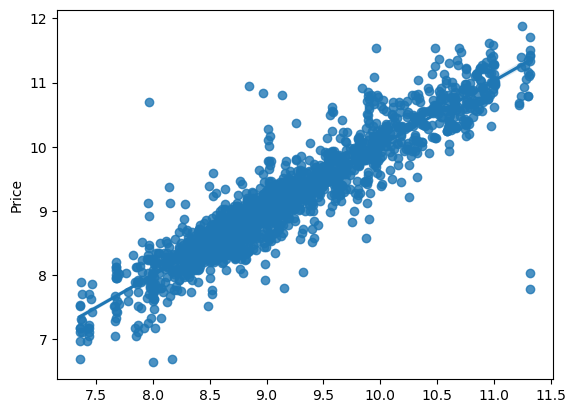

In [18]:
rfr_model = rfr(max_depth=15, min_samples_leaf=30, min_samples_split=30,n_estimators = 300,random_state=2024).fit(tr_x,tr_y)
pred = rfr_model.predict(te_x)
print(mean_absolute_error(te_y,pred))
print(np.sqrt(mean_squared_error(te_y,pred)))
print(r2_score(te_y,pred))
print(rfr_model.score(tr_x,tr_y))
sns.regplot(y=te_y,x=pred)

([<matplotlib.axis.YTick at 0x7f20f0bb2170>,
 [Text(0, 0, 'Seats_10.0'),
  Text(0, 1, 'Owner_Type_Third'),
  Text(0, 2, 'Seats_0.0'),
  Text(0, 3, 'Fuel_Type_LPG'),
  Text(0, 4, 'Fuel_Type_Electric'),
  Text(0, 5, 'Seats_2.0'),
  Text(0, 6, 'Fuel_Type_CNG'),
  Text(0, 7, 'Seats_4.0'),
  Text(0, 8, 'Seats_9.0'),
  Text(0, 9, 'Owner_Type_Second'),
  Text(0, 10, 'Year_2008'),
  Text(0, 11, 'Year_2007'),
  Text(0, 12, 'Owner_Type_Fourth & Above'),
  Text(0, 13, 'Year_2005'),
  Text(0, 14, 'Seats_8.0'),
  Text(0, 15, 'Seats_6.0'),
  Text(0, 16, 'Year_1998'),
  Text(0, 17, 'Year_1999'),
  Text(0, 18, 'Year_2000'),
  Text(0, 19, 'Year_2006'),
  Text(0, 20, 'Year_2002'),
  Text(0, 21, 'Year_2001'),
  Text(0, 22, 'Year_2003'),
  Text(0, 23, 'Year_2004'),
  Text(0, 24, 'Year_2009'),
  Text(0, 25, 'Year_2019'),
  Text(0, 26, 'Year_2010'),
  Text(0, 27, 'Year_2011'),
  Text(0, 28, 'Year_2012'),
  Text(0, 29, 'Year_2013'),
  Text(0, 30, 'Year_2014'),
  Text(0, 31, 'Seats_7.0'),
  Text(0, 32, 'Year_

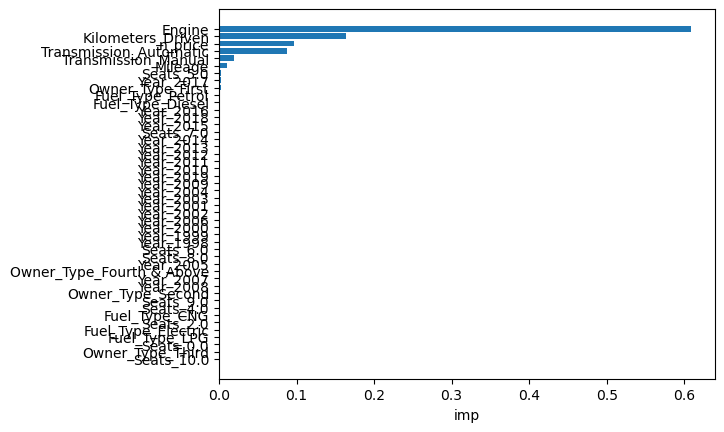

In [21]:
rfr_df = pd.DataFrame()
rfr_df['feature'] = tr_x.columns
rfr_df['imp'] = rfr_model.feature_importances_
rfr_df.sort_values('imp',ascending=True , inplace=True)

xlabel = [i for i in range(len(tr_x.columns))]
plt.barh(y = xlabel , width= rfr_df['imp'])
plt.xlabel('imp')
plt.yticks(xlabel , rfr_df['feature'])

In [21]:
gb_model = GradientBoostingRegressor(random_state=2024)
params ={'n_estimators':[100,300,500,1000] , 'min_samples_leaf':[5,10,30] , 'min_samples_split' : [50,70,100] , 'max_depth':[5,10,15]}
gb_grid = GridSearchCV(gb_model , params , scoring='r2',n_jobs=-1).fit(tr_x,tr_y)
print(gb_grid.best_estimator_)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=10,
                          min_samples_split=50, n_estimators=300,
                          random_state=2024)


In [19]:
gb_model =GradientBoostingRegressor(max_depth=5, min_samples_leaf=10,
                          min_samples_split=50, n_estimators=300,
                          random_state=2024).fit(tr_x,tr_y)
gb_pred = gb_model.predict(te_x)
print(r2_score(te_y,gb_pred))
print(mean_absolute_error(te_y,gb_pred))

0.9133614752060144
0.1716867627008047


In [20]:

# location ,power 제외
gb_model =GradientBoostingRegressor(max_depth=5, min_samples_leaf=10,
                          min_samples_split=50, n_estimators=500,
                          random_state=2024,learning_rate=0.1).fit(tr_x,tr_y)
gb_pred = gb_model.predict(te_x)
print(r2_score(te_y,gb_pred))
print(mean_absolute_error(te_y,gb_pred))
print(gb_model.score(tr_x,tr_y))

0.9135508850172331
0.17115950350875395
0.9690038559989443


In [21]:
gb_model =GradientBoostingRegressor(max_depth=5, min_samples_leaf=30,
                          min_samples_split=70, n_estimators=500,
                          random_state=2024).fit(tr_x,tr_y)
gb_pred = gb_model.predict(te_x)
print(r2_score(te_y,gb_pred))
print(mean_absolute_error(te_y,gb_pred))

0.9146148663185545
0.17186791901055512


([<matplotlib.axis.YTick at 0x7ffb55808190>,
 [Text(0, 0, 'Owner_Type'),
  Text(0, 1, 'Fuel_Type'),
  Text(0, 2, 'Seats'),
  Text(0, 3, 'Mileage'),
  Text(0, 4, 'Name'),
  Text(0, 5, 'car'),
  Text(0, 6, 'Kilometers_Driven'),
  Text(0, 7, 'n_price'),
  Text(0, 8, 'Transmission'),
  Text(0, 9, 'Year'),
  Text(0, 10, 'Engine')])

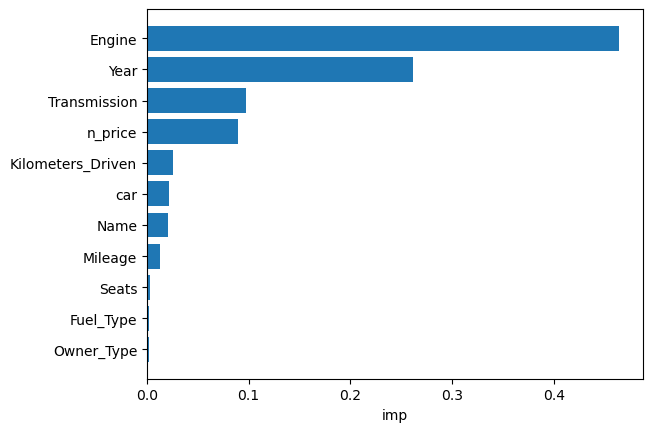

In [22]:
rfr_df = pd.DataFrame()
rfr_df['feature'] = tr_x.columns
rfr_df['imp'] = gb_model.feature_importances_
rfr_df.sort_values('imp',ascending=True , inplace=True)

xlabel = [i for i in range(len(tr_x.columns))]
plt.barh(y = xlabel , width= rfr_df['imp'])
plt.xlabel('imp')
plt.yticks(xlabel , rfr_df['feature'])

In [23]:
gb_model =GradientBoostingRegressor(max_depth=10, min_samples_leaf=30,
                          min_samples_split=60, n_estimators=500,
                          random_state=2024,learning_rate=0.1).fit(tr_x,tr_y)
gb_pred = gb_model.predict(te_x)
print(r2_score(te_y,gb_pred))
print(gb_model.score(tr_x,tr_y))
print(gb_model.score(te_x,te_y))

0.9108518626829668
0.9817081814040132
0.9108518626829668


In [23]:
xgb_model = XGBRegressor(random_state=2024)
params = {'learning_rate': [0.1,0.15,0.2] , 'n_estimators': [100,300,500,1000] , 'max_depth':[3,4,6,8]}  
xgb_grid = GridSearchCV(xgb_model,params,n_jobs=-1 , scoring='r2').fit(tr_x,tr_y)
print(xgb_grid.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2024,
             reg_alpha=0, reg_lambda=1, ...)


In [24]:
xgb_model =XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2024,
             reg_alpha=0, reg_lambda=1).fit(tr_x,tr_y)
pred = xgb_model.predict(te_x)
print(r2_score(te_y,pred))

0.9104658273426831
